# 🌲 Max Features Simple: 2 vs 3 Características

Este notebook compara de manera muy simple Random Forest con **2 características** vs **3 características** usando un dataset con 5 features.

## ¿Qué aprenderás?
- Cómo max_features afecta la selección de características
- Diferencia entre usar 2 vs 3 características por división
- Por qué menos características = más diversidad


## 📚 ¿Qué es Max Features?

**Max Features** controla cuántas características usa cada árbol al hacer divisiones.

### 🎯 En este ejemplo:
- **Dataset**: 5 características (Feature_1, Feature_2, Feature_3, Feature_4, Feature_5)
- **Comparación**: 2 características vs 3 características por división
- **Objetivo**: Ver cómo afecta la diversidad de los árboles


In [8]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


## 🎲 Ejemplo Visual: 2 vs 3 Características

Vamos a ver cómo se seleccionan las características en cada caso:


In [9]:
# Dataset simple con 5 características
print("📊 DATASET ORIGINAL")
print("=" * 30)

caracteristicas = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']
print(f"Características disponibles: {caracteristicas}")
print(f"Total de características: {len(caracteristicas)}")
print()

print("🎯 COMPARACIÓN:")
print("- max_features = 2: Usa 2 características por división")
print("- max_features = 3: Usa 3 características por división")
print()
print("💡 Hipótesis:")
print("- Con 2 características: Más diversidad entre árboles")
print("- Con 3 características: Menos diversidad, más características por árbol")


📊 DATASET ORIGINAL
Características disponibles: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']
Total de características: 5

🎯 COMPARACIÓN:
- max_features = 2: Usa 2 características por división
- max_features = 3: Usa 3 características por división

💡 Hipótesis:
- Con 2 características: Más diversidad entre árboles
- Con 3 características: Menos diversidad, más características por árbol


In [10]:
# Simular selección de características
print("🎲 SIMULACIÓN DE SELECCIÓN DE CARACTERÍSTICAS")
print("=" * 50)

np.random.seed(42)  # Para reproducibilidad

# Simular 3 divisiones para cada caso
for max_feat in [2, 3]:
    print(f"\n📊 max_features = {max_feat} características:")
    print("-" * 40)
    
    for division in range(3):
        # Seleccionar características aleatoriamente
        indices_seleccionados = np.random.choice(5, size=max_feat, replace=False)
        caracteristicas_seleccionadas = [caracteristicas[i] for i in sorted(indices_seleccionados)]
        print(f"  División {division+1}: {caracteristicas_seleccionadas}")

print("\n💡 Observaciones:")
print("- Con 2 características: Cada división usa solo 2 de las 5 disponibles")
print("- Con 3 características: Cada división usa 3 de las 5 disponibles")
print("- Menos características = más diversidad entre árboles")
print("- Más características = árboles más similares")


🎲 SIMULACIÓN DE SELECCIÓN DE CARACTERÍSTICAS

📊 max_features = 2 características:
----------------------------------------
  División 1: ['Feature_2', 'Feature_5']
  División 2: ['Feature_2', 'Feature_4']
  División 3: ['Feature_1', 'Feature_2']

📊 max_features = 3 características:
----------------------------------------
  División 1: ['Feature_1', 'Feature_2', 'Feature_3']
  División 2: ['Feature_1', 'Feature_3', 'Feature_4']
  División 3: ['Feature_1', 'Feature_3', 'Feature_5']

💡 Observaciones:
- Con 2 características: Cada división usa solo 2 de las 5 disponibles
- Con 3 características: Cada división usa 3 de las 5 disponibles
- Menos características = más diversidad entre árboles
- Más características = árboles más similares


## 🌳 Comparación en Random Forest Real

Ahora vamos a comparar los dos modelos:


In [11]:
# Generar dataset con 5 características
print("📊 GENERANDO DATASET")
print("=" * 30)

X, y = make_classification(
    n_samples=200,  # 200 muestras
    n_features=5,   # 5 características
    n_classes=2,    # 2 clases
    random_state=42
)

print(f"Dataset generado:")
print(f"- Muestras: {X.shape[0]}")
print(f"- Características: {X.shape[1]}")
print(f"- Clases: {len(np.unique(y))}")
print()

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"División:")
print(f"- Entrenamiento: {X_train.shape[0]} muestras")
print(f"- Prueba: {X_test.shape[0]} muestras")


📊 GENERANDO DATASET
Dataset generado:
- Muestras: 200
- Características: 5
- Clases: 2

División:
- Entrenamiento: 140 muestras
- Prueba: 60 muestras


In [12]:
# Comparar Random Forest: 2 vs 3 características
print("🌲 COMPARANDO RANDOM FOREST: 2 vs 3 CARACTERÍSTICAS")
print("=" * 60)

# Entrenar modelo con 2 características
print("🔧 Entrenando con max_features = 2...")
rf_2 = RandomForestClassifier(
    n_estimators=10,  # 10 árboles
    max_features=2,   # 2 características
    random_state=42
)
rf_2.fit(X_train, y_train)
y_pred_2 = rf_2.predict(X_test)
acc_2 = accuracy_score(y_test, y_pred_2)
print(f"   ✅ Accuracy: {acc_2:.4f}")

print()

# Entrenar modelo con 3 características
print("🔧 Entrenando con max_features = 3...")
rf_3 = RandomForestClassifier(
    n_estimators=10,  # 10 árboles
    max_features=3,   # 3 características
    random_state=42
)
rf_3.fit(X_train, y_train)
y_pred_3 = rf_3.predict(X_test)
acc_3 = accuracy_score(y_test, y_pred_3)
print(f"   ✅ Accuracy: {acc_3:.4f}")

print()
print("📊 COMPARACIÓN:")
print(f"2 características: {acc_2:.4f}")
print(f"3 características: {acc_3:.4f}")
print(f"Diferencia: {abs(acc_2 - acc_3):.4f}")


🌲 COMPARANDO RANDOM FOREST: 2 vs 3 CARACTERÍSTICAS
🔧 Entrenando con max_features = 2...
   ✅ Accuracy: 0.8667

🔧 Entrenando con max_features = 3...
   ✅ Accuracy: 0.8500

📊 COMPARACIÓN:
2 características: 0.8667
3 características: 0.8500
Diferencia: 0.0167


## 🔍 Análisis de Diversidad

Vamos a ver cómo afecta la diversidad de los árboles:


🔍 ANÁLISIS DE DIVERSIDAD DE ÁRBOLES
Modelo con 2 características:
  Nodos: 28.2 ± 6.0
  Hojas: 14.6 ± 3.0

Modelo con 3 características:
  Nodos: 27.4 ± 7.7
  Hojas: 14.2 ± 3.9


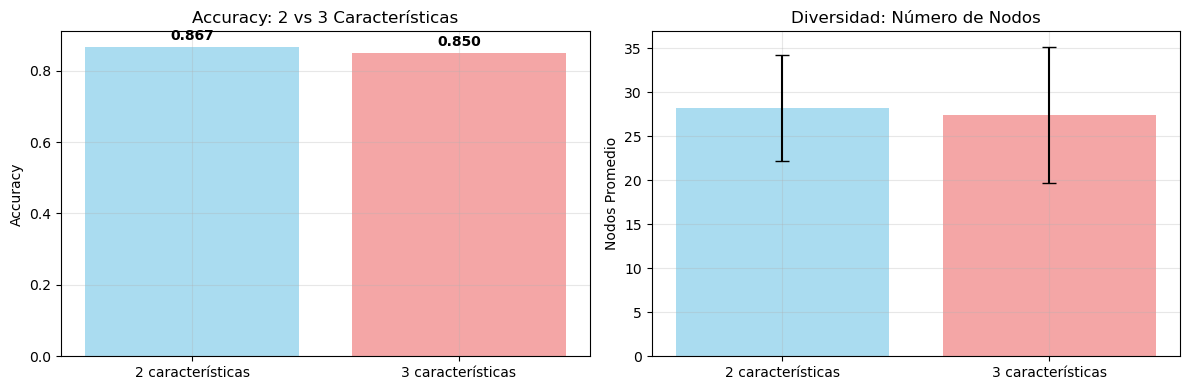


💡 Interpretación:
- Con 2 características: Más diversidad entre árboles
- Con 3 características: Menos diversidad, árboles más similares
- La diversidad se mide por la variación en el número de nodos


In [13]:
# Analizar diversidad de los árboles
print("🔍 ANÁLISIS DE DIVERSIDAD DE ÁRBOLES")
print("=" * 50)

# Analizar los primeros 5 árboles de cada modelo
print("Modelo con 2 características:")
nodos_2 = [tree.tree_.node_count for tree in rf_2.estimators_[:5]]
hojas_2 = [tree.tree_.n_leaves for tree in rf_2.estimators_[:5]]
print(f"  Nodos: {np.mean(nodos_2):.1f} ± {np.std(nodos_2):.1f}")
print(f"  Hojas: {np.mean(hojas_2):.1f} ± {np.std(hojas_2):.1f}")

print()
print("Modelo con 3 características:")
nodos_3 = [tree.tree_.node_count for tree in rf_3.estimators_[:5]]
hojas_3 = [tree.tree_.n_leaves for tree in rf_3.estimators_[:5]]
print(f"  Nodos: {np.mean(nodos_3):.1f} ± {np.std(nodos_3):.1f}")
print(f"  Hojas: {np.mean(hojas_3):.1f} ± {np.std(hojas_3):.1f}")

# Visualización simple
plt.figure(figsize=(12, 4))

# Gráfico 1: Accuracy
plt.subplot(1, 2, 1)
plt.bar(['2 características', '3 características'], [acc_2, acc_3], 
        color=['skyblue', 'lightcoral'], alpha=0.7)
plt.title('Accuracy: 2 vs 3 Características')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)

# Agregar valores en las barras
plt.text(0, acc_2 + 0.01, f'{acc_2:.3f}', ha='center', va='bottom', fontweight='bold')
plt.text(1, acc_3 + 0.01, f'{acc_3:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Diversidad (nodos)
plt.subplot(1, 2, 2)
plt.bar(['2 características', '3 características'], 
        [np.mean(nodos_2), np.mean(nodos_3)], 
        yerr=[np.std(nodos_2), np.std(nodos_3)],
        color=['skyblue', 'lightcoral'], alpha=0.7, capsize=5)
plt.title('Diversidad: Número de Nodos')
plt.ylabel('Nodos Promedio')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretación:")
print("- Con 2 características: Más diversidad entre árboles")
print("- Con 3 características: Menos diversidad, árboles más similares")
print("- La diversidad se mide por la variación en el número de nodos")


## 🎯 Resumen Simple

### ✅ **¿Qué aprendimos?**

1. **Con 2 características**: 
   - Más diversidad entre árboles
   - Cada árbol usa diferentes combinaciones de características
   - Menos overfitting

2. **Con 3 características**:
   - Menos diversidad entre árboles
   - Los árboles son más similares
   - Más características por división

### 💡 **Recomendación:**
- **Usa 2 características** si quieres más diversidad y menos overfitting
- **Usa 3 características** si quieres más estabilidad y rendimiento individual
- **Experimenta** con tu dataset para encontrar el balance óptimo


In [14]:
# ¡Ejemplo completado!
print("🎉 ¡EJEMPLO COMPLETADO!")
print("=" * 30)
print("Has visto cómo max_features afecta Random Forest:")
print("• 2 características = más diversidad")
print("• 3 características = menos diversidad")
print("• La diversidad se mide por la variación en nodos")
print()
print("¡Experimenta con tu propio dataset!")


🎉 ¡EJEMPLO COMPLETADO!
Has visto cómo max_features afecta Random Forest:
• 2 características = más diversidad
• 3 características = menos diversidad
• La diversidad se mide por la variación en nodos

¡Experimenta con tu propio dataset!
